# Deep learning with OpenCV
https://www.pyimagesearch.com/2017/08/21/deep-learning-with-opencv/

In [1]:
import numpy as np
import argparse
import time
import cv2
import matplotlib.pyplot as plt

## Settings

In [2]:
image_path = 'images/eagle.png'
prototxt_path = 'models/bvlc_googlenet.prototxt'
model_path = 'models/bvlc_googlenet.caffemodel'
labels_path = 'models/synset_words.txt'

## Preprocessing

In [3]:
# Load the input image from disk
image = cv2.imread(image_path)

# Load the class labels from disk
rows = open(labels_path).read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

# Load our serialized model from disk
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

# Our CNN requires fixed spatial dimensions for our input image(s)
# so we need to ensure it is resized to 224x224 pixels while
# performing mean subtraction (104, 117, 123) to normalize the input;
# after executing this command our "blob" now has the shape:
# (1, 3, 224, 224)
blob = cv2.dnn.blobFromImage(image, scalefactor=1, size=(224, 224), mean=(104, 117, 123))
print(blob.shape)

(1, 3, 224, 224)


## Classify the input image

In [4]:
# Set the blob as input to the network and perform a forward-pass to
# obtain our output classification
net.setInput(blob)
start = time.time()
preds = net.forward()
end = time.time()
print("Classification has taken {:.5} seconds".format(end - start))

Classification has taken 0.034541 seconds


1. label: bald eagle, probability: 99.997%
2. label: kite, probability: 0.0034535%
3. label: vulture, probability: 1.6599e-05%
4. label: hornbill, probability: 2.8287e-06%
5. label: albatross, probability: 2.4403e-06%


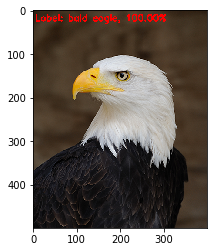

In [5]:
# Sort the indexes of the probabilities in descending order (higher
# probabilitiy first) and grab the top-5 predictions
idxs = np.argsort(preds[0])[::-1][:5]

# Loop over the top-5 predictions and display them
for (i, idx) in enumerate(idxs):
    # Draw the top prediction on the input image
    if i == 0:
        text = "Label: {}, {:.2f}%".format(classes[idx], preds[0][idx] * 100)
        cv2.putText(image, text, (5, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
    # Display the predicted label + associated probability to the console
    print("{}. label: {}, probability: {:.5}%".format(i + 1, classes[idx], preds[0][idx] * 100))

# Display the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))